In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
from scipy.spatial.distance import euclidean

In [36]:
from sklearn.metrics.pairwise import euclidean_distances

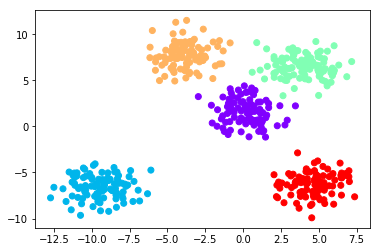

In [79]:
#generating data
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=500, n_features=2, 
                           centers=5, cluster_std=1.2,random_state=101)
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

plt.show()

In [82]:
dunn_index(df, 5)

C:\Users\Luan Brasil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Luan Brasil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.8433480009754464

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
       ... 
470    True
471    True
472    True
473    True
474    True
475    True
476    True
477    True
478    True
479    True
480    True
481    True
482    True
483    True
484    True
485    True
486    True
487    True
488    True
489    True
490    True
491    True
492    True
493    True
494    True
495    True
496    True
497    True
498    True
499    True
Name: labels, Length: 500, dtype: bool

In [81]:
df = pd.DataFrame(data[0])
df['labels'] = data[1]

df

,0,1,labels
0,-8.429290,-6.738085,1
1,-11.290121,-6.047263,1
2,0.392366,-1.124784,0
3,-1.349975,1.150179,0
4,-1.973875,9.173053,3
5,-9.321677,-4.983508,1
6,-0.804115,1.995054,0
7,6.990641,-4.810079,4
8,-8.523625,-4.459821,1
9,-8.879304,-5.866952,1


## Calculate the diameters of all clusters

In [4]:
def diameters(df, number_of_clusters):
    n_clusters = np.arange(0, number_of_clusters)
    diameters = []
    #for each cluster
    for c in n_clusters:
        distances = []
        cluster = df.loc[df['labels'] == c]
        cluster.drop('labels', axis=1, inplace=True)
        #calculates distance between all points in  the cluster
        for i in range(len(cluster)):
            for j in range(i+1, len(cluster)):
                distances.append(euclidean(cluster.iloc[i,:], cluster.iloc[j,:]))
        #appends the maximum distance between two points in the cluster,
        #i.e., its diameter, to the list of diameters of all clusters
        diameters.append(max(distances))
    
    return diameters

In [21]:
def cluster_midpoints(df, number_of_clusters):
    n_clusters = np.arange(0, number_of_clusters)
    midpoints = []
    
    for c in n_clusters:
        cluster = df.loc[df['labels'] == c]
        cluster.drop('labels', axis=1, inplace=True)
        midpoint = []
        for i in range(len(cluster.columns)):
            midpoint.append(np.mean(cluster.iloc[:,i]))
        midpoints.append(midpoint)
    
    return midpoints

In [57]:
def midpoints_dist(df, number_of_clusters, minDist):
    midpoints = cluster_midpoints(df, 4)
    dist_midpoints = []
    
    for i in range(len(midpoints)):
        for j in range(i+1, len(midpoints)):
            dist_midpoints.append(euclidean(midpoints[i], midpoints[j]))
    
    if minDist == True:
        return min(dist_midpoints)
    else:
        return dist_midpoints

In [58]:
midpoints_dist(df, 4, minDist=True)

C:\Users\Luan Brasil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


6.080290019977491

In [8]:
#calculate distances between cluster midpoints
def min_dist_interpoints(points, n_points):
    distances = list()
    for i in range(n_points):
        if i < n_points-1:
            distances.append(euclidean(points[i], points[i+1]))
        else:
            distances.append(euclidean(points[0], points[i]))
    return min(distances)

In [ ]:
#ideia: calcular os pontos médios de cada cluster e, então, a distância entre eles
'''def min_intercluster_distance(data, n_clusters):
    midpoints = list()
    clusters = list(np.arange(1, n_clusters+1))
    for i in range(n_clusters):
        cluster = data.loc[data['labels'] == clusters[i]]
        for k in range(len(cluster)):
            cluster_features = list()
            cluster_features.append(cluster.drop('labels', axis=1).iloc[k,:])
        midpoint_features = list()
        for j in range(len(cluster.drop('labels', axis=1).columns)):
            midpoint_features.append(cluster.drop('labels', axis=1).iloc[:,j].mean())
        #midpoint_features = pd.Series(midpoint_features)
        midpoints.append(midpoint_features)
    return min_dist_interpoints(midpoints, n_clusters)'''

In [9]:
def min_intercluster_distance(n_clusters, centers):
    return min_dist_interpoints(centers, n_clusters)

### Calculate general Dunn index

In [60]:
def dunn_index(data, number_of_clusters):
    dunn_index = midpoints_dist(df, 4, minDist=True)/max(diameters(df, number_of_clusters))
    return dunn_index

In [62]:
round(dunn_index(df, 4), 4)

C:\Users\Luan Brasil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Luan Brasil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.557

### A partir daqui: código da internet

In [101]:
midpoints_dist(df, 5, minDist=True)

C:\Users\Luan Brasil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


6.1376403921211

In [100]:
max(diameter(df['labels'], euclidean_distances(df.drop('labels', axis=1))))*dunn(df['labels'], euclidean_distances(df.drop('labels', axis=1)))

11.911927239140045

In [63]:
import numpy as np


def normalize_to_smallest_integers(labels):
    """Normalizes a list of integers so that each number is reduced to the minimum possible integer, maintaining the order of elements.

    :param labels: the list to be normalized
    :returns: a numpy.array with the values normalized as the minimum integers between 0 and the maximum possible value.
    """

    max_v = len(set(labels)) if -1 not in labels else len(set(labels)) - 1
    sorted_labels = np.sort(np.unique(labels))
    unique_labels = range(max_v)
    new_c = np.zeros(len(labels), dtype=np.int32)

    for i, clust in enumerate(sorted_labels):
        new_c[labels == clust] = unique_labels[i]

    return new_c


def dunn(labels, distances):
    """
    Dunn index for cluster validation (the bigger, the better)
    
    .. math:: D = \\min_{i = 1 \\ldots n_c; j = i + 1\ldots n_c} \\left\\lbrace \\frac{d \\left( c_i,c_j \\right)}{\\max_{k = 1 \\ldots n_c} \\left(diam \\left(c_k \\right) \\right)} \\right\\rbrace
    
    where :math:`d(c_i,c_j)` represents the distance between
    clusters :math:`c_i` and :math:`c_j`, given by the distances between its
    two closest data points, and :math:`diam(c_k)` is the diameter of cluster
    :math:`c_k`, given by the distance between its two farthest data points.
    
    The bigger the value of the resulting Dunn index, the better the clustering
    result is considered, since higher values indicate that clusters are
    compact (small :math:`diam(c_k)`) and far apart.

    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    
    .. [Kovacs2005] Kovács, F., Legány, C., & Babos, A. (2005). Cluster validity measurement techniques. 6th International Symposium of Hungarian Researchers on Computational Intelligence.
    """

    labels = normalize_to_smallest_integers(labels)

    unique_cluster_distances = np.unique(min_cluster_distances(labels, distances))
    max_diameter = max(diameter(labels, distances))

    if np.size(unique_cluster_distances) > 1:
        return unique_cluster_distances[1] / max_diameter
    else:
        return unique_cluster_distances[0] / max_diameter


def min_cluster_distances(labels, distances):
    """Calculates the distances between the two nearest points of each cluster.

    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    """
    labels = normalize_to_smallest_integers(labels)
    n_unique_labels = len(np.unique(labels))

    min_distances = np.zeros((n_unique_labels, n_unique_labels))
    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i + 1, len(labels)):
            if labels[i] != labels[ii] and distances[i, ii] > min_distances[labels[i], labels[ii]]:
                min_distances[labels[i], labels[ii]] = min_distances[labels[ii], labels[i]] = distances[i, ii]
    return min_distances

    
def diameter(labels, distances):
    """Calculates cluster diameters (the distance between the two farthest data points in a cluster)

    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :returns:
    """
    labels = normalize_to_smallest_integers(labels)
    n_clusters = len(np.unique(labels))
    diameters = np.zeros(n_clusters)

    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i + 1, len(labels)):
            if labels[i] == labels[ii] and distances[i, ii] > diameters[labels[i]]:
                diameters[labels[i]] = distances[i, ii]
    return diameters

In [65]:
dunn(df['labels'], euclidean_distances(df))

1.4135987707394269

In [70]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

data = load_iris()
c = data['target']
x = data['data']
k = KMeans(n_clusters=3).fit_predict(x)
dund = dunn(c, euclidean_distances(x))
dunk = dunn(k, euclidean_distances(x))

#print(x, c, dund, dunk)

In [75]:
iris = pd.DataFrame(data['data'])
iris['labels'] = data['target']

iris

,0,1,2,3,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [77]:
round(dunn_index(iris, 3), 4)

C:\Users\Luan Brasil\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Luan Brasil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.557